In [286]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import pickle

In [287]:
# Read data
df = pd.read_csv('./homework/tekoäly_oppimistehtävä/datasets/fish_data.csv')

# Drop rows with missing values
df = df.dropna()

y = df['life_span']
X = df[['average_length(inches))',
        'average_weight(inches))',
        'habitat',
        'color',
        'ph_of_water',
        'Gender' # true = male, false = female
        ]]
y = y.values.reshape(-1,1)

In [288]:
# Statistics
print('Statistics:')
print(X.describe())

# Info
print('Info:')
print(X.info())

Statistics:
       average_length(inches))  average_weight(inches))  ph_of_water
count              1976.000000              1976.000000  1976.000000
mean                 10.557586                10.449297     7.014727
std                   5.525760                 4.898631     0.577608
min                   1.000000                 2.000000     6.000000
25%                   5.850000                 6.127500     6.500000
50%                  10.680000                10.455000     7.000000
75%                  15.172500                14.700000     7.500000
max                  20.000000                18.960000     8.000000
Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1976 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   average_length(inches))  1976 non-null   float64
 1   average_weight(inches))  1976 non-null   float64
 2   habitat                  1976 non-null 

In [289]:
# One hot encoding
X_org = X
ct = ColumnTransformer(transformers=[('encoder',
OneHotEncoder(drop='first'), ['habitat', 'color', 'Gender'])], remainder='passthrough')
X = ct.fit_transform(X)

In [290]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 0)

In [291]:
# Scale data
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

In [292]:
# Training the Multiple Linear Regression model on the Training set
model = Sequential()
model.add(Dense(15, input_dim=X.shape[1], activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
history=model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test,y_test))

Epoch 1/20
99/99 [==============================] - 1s 8ms/step - loss: 1.4671 - mse: 1.4671 - val_loss: 1.1619 - val_mse: 1.1619
Epoch 2/20
99/99 [==============================] - 1s 8ms/step - loss: 1.2910 - mse: 1.2910 - val_loss: 1.0682 - val_mse: 1.0682
Epoch 3/20
99/99 [==============================] - 1s 8ms/step - loss: 1.1584 - mse: 1.1584 - val_loss: 1.0246 - val_mse: 1.0246
Epoch 4/20
99/99 [==============================] - 1s 9ms/step - loss: 1.1164 - mse: 1.1164 - val_loss: 1.0111 - val_mse: 1.0111
Epoch 5/20
99/99 [==============================] - 1s 8ms/step - loss: 1.1044 - mse: 1.1044 - val_loss: 0.9974 - val_mse: 0.9974
Epoch 6/20
99/99 [==============================] - 1s 8ms/step - loss: 1.0767 - mse: 1.0767 - val_loss: 0.9881 - val_mse: 0.9881
Epoch 7/20
99/99 [==============================] - 1s 9ms/step - loss: 1.0486 - mse: 1.0486 - val_loss: 0.9807 - val_mse: 0.9807
Epoch 8/20
99/99 [==============================] - 1s 9ms/step - loss: 1.0491 - mse: 1.04

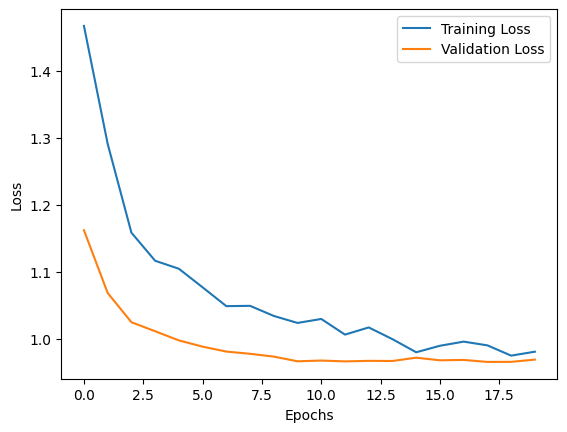

In [293]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

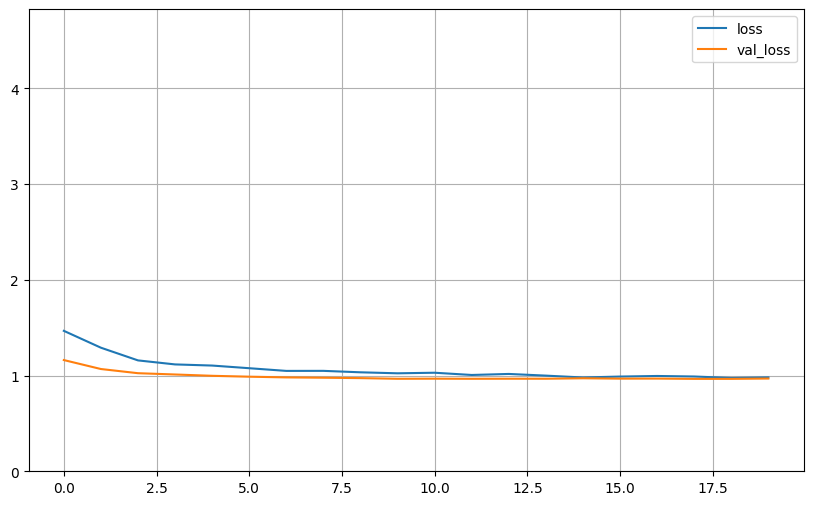

In [294]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.ylim(bottom=0, top=5 * min(history.history['val_loss']))
plt.grid(True)
plt.show()

In [295]:
# Predicting the Test set results
y_pred = scaler_y.inverse_transform(model.predict(X_test))
y_test = scaler_y.inverse_transform(y_test)

13/13 [==============================] - 0s 2ms/step


In [298]:
# Regression metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'r2:  {round(r2,4)}')
print(f'mae: {round(mae,4)}')
print(f'mse: {round(mse,4)}')
print(f'rmse: {round(rmse,4)}')

r2:  -0.0695
mae: 6.5826
mse: 58.7522
rmse: 7.665


In [297]:
# Saving model
with open('./homework/tekoäly_oppimistehtävä/models/lifespan-ann-reg.pickle', 'wb') as f:
    pickle.dump(model, f)